Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
None
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'class'],
      dtype='object')
(700, 10)

Number of samples for each class:
0    459
1    241
Name: class, dtype: int64


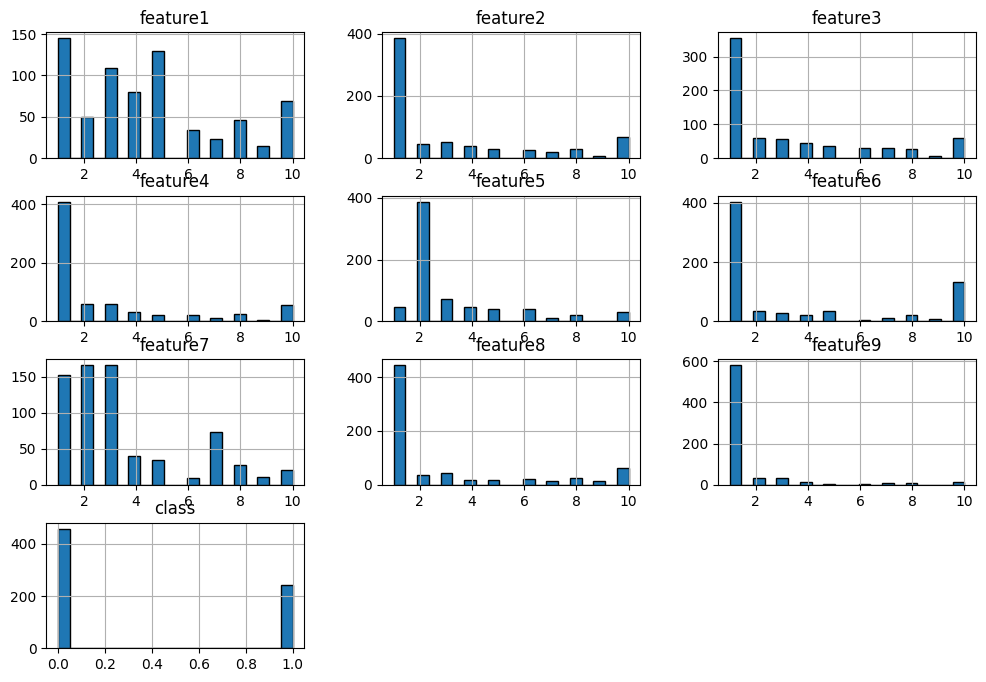

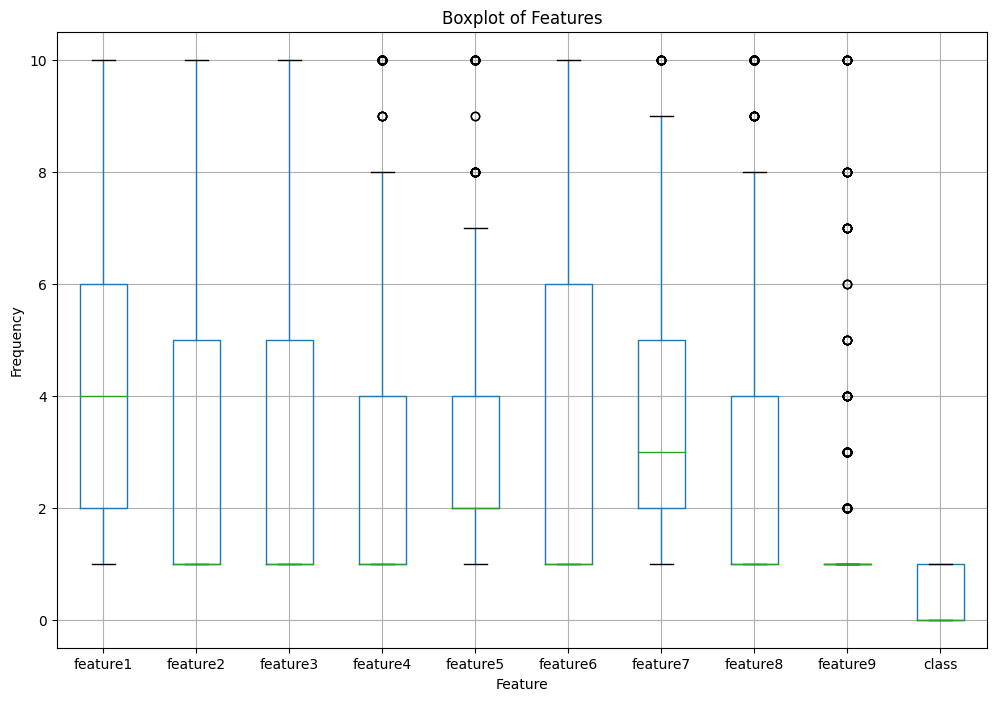

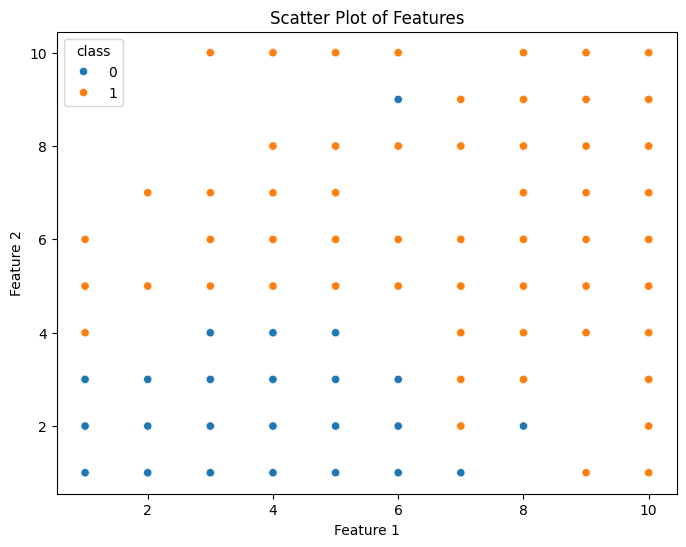


Statistical Description of Features for Class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.00000

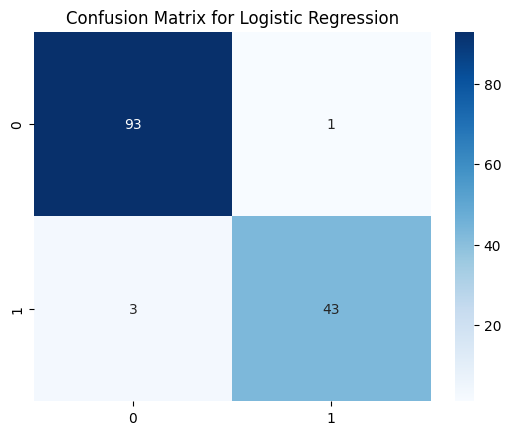

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.98      0.93      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



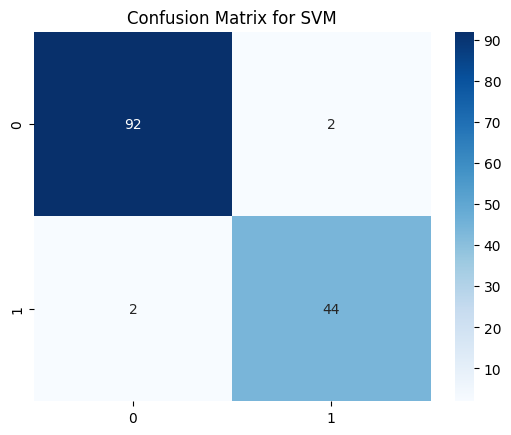

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.96      0.96      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



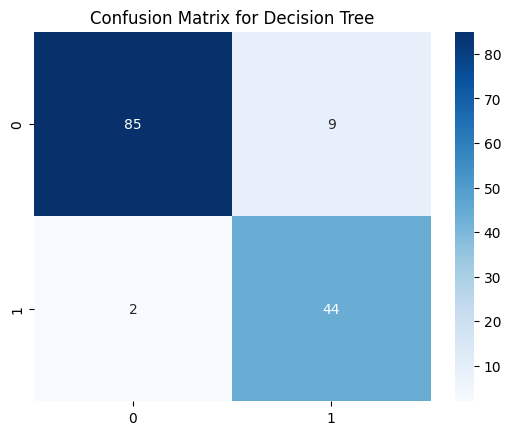

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        94
           1       0.83      0.96      0.89        46

    accuracy                           0.92       140
   macro avg       0.90      0.93      0.91       140
weighted avg       0.93      0.92      0.92       140

                 Model  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.973011  0.962072  0.967251  0.971429
1                  SVM   0.967623  0.967623  0.967623  0.971429
2        Decision Tree   0.903600  0.930389  0.914058  0.921429


In [ ]:
"""
Name: Divya Tallur
"""


"""
Step-1: Importing the Libraries
-----------------------------
- Importing all the required libraries for Binary Classification problem
- Pandas - Functins to manipulate structured data
- Numpy - Numerical computations
- Matplotlib & Seaborn - Visualization purposes
- Sklearn - Machine Learning
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score,classification_report

"""
------------------------------------------------------------------------------------------------------------------
Step-2: Importing the Dataset
------------------------------------------------------------------------------------------------------------------
- Importing the given dataset into datframe using pandas package
- Reading the information of the datframe using in - built functions
"""

# Import the CSV file
data = pd.read_csv('dataset.csv')

# Print data information and check the shape and columns in the dataset
print("Data Information:")
print(data.info())
print(data.columns)
print(data.shape)

"""
-----------------------------------------------------------------------------------------------------------------
Step-3: Understand the Dataset
-----------------------------------------------------------------------------------------------------------------
- Understanding number of samples for each class in the dataset
- Visualize the dataset using boxplots, histograms etc.,
- Descriptive statistics understanding for each class individually
"""

# Print number of samples for each class
print("\nNumber of samples for each class:")
print(data['class'].value_counts())

# Plotting histograms for feature distribution calling .hist() function on df which uses underlying matplotlib
data.hist(figsize=(12, 8),bins=20,grid=True,edgecolor='black')
plt.title('Histogram of Feature')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.show()

# Box plots for understanding feature distribution
data.boxplot(figsize=(12, 8))
plt.title('Boxplot of Features')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.show()

# Scatter plot (assuming two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature1', y='feature2', hue='class', data=data)
plt.title('Scatter Plot of Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Statistical description of features by each class

#For Class 0
print("\nStatistical Description of Features for Class 0:")
data_0=data[data['class']==0]
print(data_0.describe())

#For Class 1
print("\nStatistical Description of Features for Class 1:")
data_1=data[data['class']==1]
print(data_1.describe())

"""
-----------------------------------------------------------------------------------------------------------------
Step-4: Splitting the Dataset
-----------------------------------------------------------------------------------------------------------------
- Randomly splitting the data using train-test-split function
"""
# Randomly split data into training and testing sets (80% training, 20% testing)
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
-----------------------------------------------------------------------------------------------------------------
Step-5: Classification Algorithm
-----------------------------------------------------------------------------------------------------------------
- Scaling the input data using standard scalar
- Logistic Regression, SVM and Decision Tree Algorithms
- Hyperparmeter tuning for all the three algorithms used
- Estimating the best hyperparameters using GridsearchCV method
- Confusion matrix plotting and model evaluation
"""
# Feature scaling using Statndard scale to have all the features on smale scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define and train the models - Logistic Regression/SVC/Decision Tree
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree":DecisionTreeClassifier()
}

# Creating a disctionary to store all the hyperparameters for the 3 models chosen value
param_grid = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "SVM": {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree":{'max_depth': [3, 5, 7, 10],'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],'criterion': ['gini', 'entropy']}
}

#Using GridsearchCV method to do all the combinations and find the best hyperparameter value
best_estimators = {}

for name, model in models.items():
    #Using 5-fold cross validation (cv=5)
    clf = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    #Getting the best estimator of all the provided hyperprameters
    best_estimators[name] = clf.best_estimator_
    print(f"{name} best parameters: {clf.best_params_}")

# Evaluate the models using Precision/Recall/F1score/Accuracy
results = []

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    #Inbuilt function to get Precision, Recall and F1 scores
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Precision": precision, "Recall": recall, "F1-Score": f1, "Accuracy": accuracy})
    # Plot the confusion matrix using Seaborn function
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,  cmap='Blues', fmt='g')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    #Getting the classification report for all the models - includes class-wise(0/1) Precision, Recall,F1 scores and accuracy
    print(classification_report(y_test, y_pred))




